# Multiple Linear Regression
## Backward Elimination
Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically take<br>
cares of selecting the statistically significant features when training the model to make it accurate <br>
predictors.
### Having a look at our Data
- Check for NaN/Missing Value.
- Check for categorical variable. The state column is categorical.
  - One-Hot encode Categorical Variable to Numeric.

# Goal: 
- **predicting startup profits based on various expenditures and location data, often serving as a benchmark for multiple linear regression**<br>
  **and data analysis projects**.

# 0. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Importing the Data Set

In [2]:
# 1. Importing the data set
data_set = pd.read_csv('50_Startups.csv')
# 2. ready/locating the features/independent Variable
X = data_set.iloc[:, :-1].values
# Reading/locating the dependent variable i.e what we want to predict
Y = data_set.iloc[:, -1].values

In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [4]:
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


# 2. Taking Care of Missing Data
We don't have Missing Data

# 3. Encoding Categorical Data 
Using One-Hot Encoding to encode the State Variable.

In [5]:
# Explanation in Linear regression section.
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Since State is at index 3 with to enter the index as 3
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))


In [6]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

# 4. Splitting the Data Set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 5. Feature Scaling
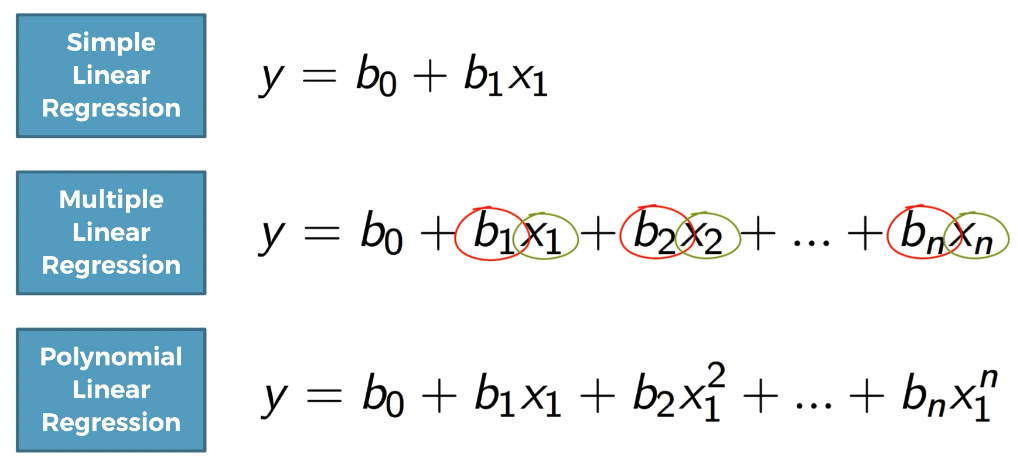 <br>
In Multiple Linear Regression we don't have to apply feature Scaling, this is because the feature in the equation of the linear regression the coefficient $b_n$ <br>
is multiply to each feature/individual variable and therefor doesn't matter if some feature have higher value than others because the coefficient $b_n$ will<br>
compensate to put every thing on the same scale therefor <br>

**No need to apply feature Scaling**<br>

# 6. Training the Multi Linear Regression Model on the Training set
The Multi-Linear Regression Class that we're about to import will **build the Multi-Linear Regression Model itself**, **Train it** and **will automatically**<br>
**avoid the trap of the Dummy variable** i.e. the column obtain from the One-Hot encoding will automatically be outcast<br>
- For the exact same reason as for the **Dummy variable**, the **Class we're going to import** wil _automatically identify the best feature_ that has the **highest** <br>
  **P-Value** 
- The **same Class** we import for Linear regression is still the same class we're going to used for Multiple-Linear regression<br>

In [8]:
# Importing the LinearRegression class
from sklearn.linear_model import LinearRegression

# 1. Creating our Linear regression class or object.                     <= Building our Model.
regressor = LinearRegression()                               # Just like simple Linear Regression we don't have to enter any parameter.
                                                             # With this line of code we actually build our simple linear regression model


# 2. Trining our Model to understand the correlation between different types of spends by the 50 Start-ups and their profits
# Invest can deploy this model on new start-up in order to predict what profit they can generate base on this information.
#                                                                         <= Training our Model                             
regressor.fit(X_train, Y_train)                              # The fit() method take as parameter X and Y Train of the Training Set

LinearRegression()

# 7. Evaluating our Model: Predicting the Test Result.
Here we're checking the performance of our model on new observation. But this time have 4 feature instead <br>
of one contrary to linear regression. Therefore
- We can not plot a graph as it was the case for simple linear regression, since we have 54 features and we will <br>
  need a 5D Graph. Instead <br>
  - Instead we will display 2 vectors: <br>
    -  The First vector been the vector  of the 10 real profit from the test set i.e the 10 ground truth
    -  And the 2nd vector been the vector of the 10 predicted profit of the same test set.
  So that, we can compare if our predicted profit is close to our real profit.<br>
  i.e we want to see if the prediction are close to the real result. <br>

In [ ]:
# 1. Getting the vector of predicted profit in the test set, in order word...
# ... Predicting the profit
Y_pred = regressor.predict(X_test)                     # Same as by linear regression with the feature of the test set as parameter
np.set_printoptions(precision = 2)                     # Display number with using 2 decimal places.

# 2. Displaying the 2 vectors of the real and predicted profit next to each other.
# we want to display the result in a column not as a row.
#                                               , we're evaluating our model on the test set.
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))       # reshape the array from row to column
                                                                                                 # 1 mean horizontal concatenation of the 2 variable

# 3. visualize the concatenating result to see if the predicted profit is close to the real profit

# => from the result, we can see the predicted profit is very close to the real profit. <= that was an amazing prediction.
# => some prediction are amazing, other are ok and some are not to far from the real result.
# From the result we see we can say that the multi linear regression is not too far from the real result. i.e....
#... it's well adapted to the data set.The Data set does not necessarily have some perfect linear correlation....
#... but with this linear regression class we were able to select the right feature with the right parameter to...
#... to make this prediction, even by tuning using backward propagation we will get similar result.
# In the real life we will try other models, which can tune also and in the end we will compare the performance of each of this model...
#...and select the best one.

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
